# Нахождение уровней энергии в горбатой яме

Обезразмерим нашу яму так, что а равно единице, коэффициент перед второй производной равен единице

Импортируем всё, что пригодится

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Теперь введём функцию, выдающую Гамильтониан для плоской ямы для заданного размера сетки

In [2]:
def Hamilt(n):
    H = np.zeros([n,n])
    for j in range(n-2):
        i = j + 1
        H[i,i] = -2
        H[i, i - 1] = H[i, i + 1] = 1  
    return H

Введём функцию, которая будет горбатить наш потенциал кошинусовминусвторойстпениобразным горбом высоты height

In [3]:
def gorb(H, height):
    n = H.shape[0]
    delta = 1/(np.cosh(1))**2
    gorb = np.array([1/(np.cosh(2 * i / n - 1))**2 for i in range(n)])
    gorb -= delta
    gorb *= height
    return H + np.diag(gorb)

Введём функцию, которая будет строить графики собственных значений для горбатой и безгорбой ям

In [4]:
def graph(n, h):
    H = Hamilt(n)
    H_g = gorb(H, h)
    norm = np.sort(np.linalg.eig(H)[0])
    nenorm = np.sort(np.linalg.eig(H_g)[0])
    plt.figure()
    plt.plot(norm, color = 'red')
    plt.plot(nenorm, color = 'blue')

Построим несколько графиков для различных параметров

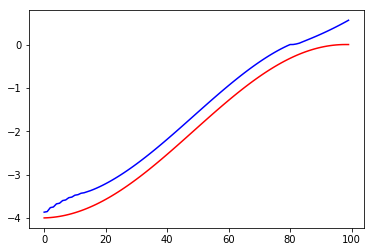

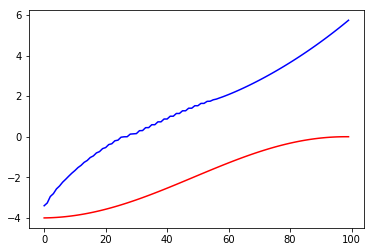

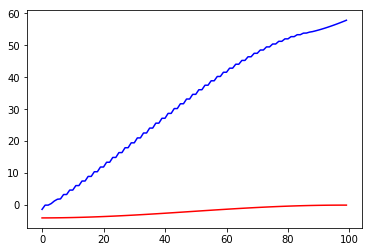

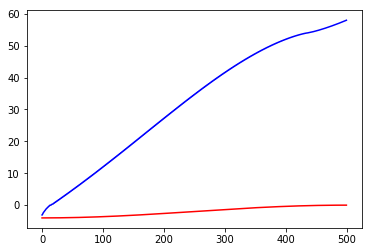

In [5]:
graph(100, 1)
graph(100, 10)
graph(100, 100)
graph(500, 100)

Как видим, распределение энергий остаётся похожим, но сильно меняется максимальная